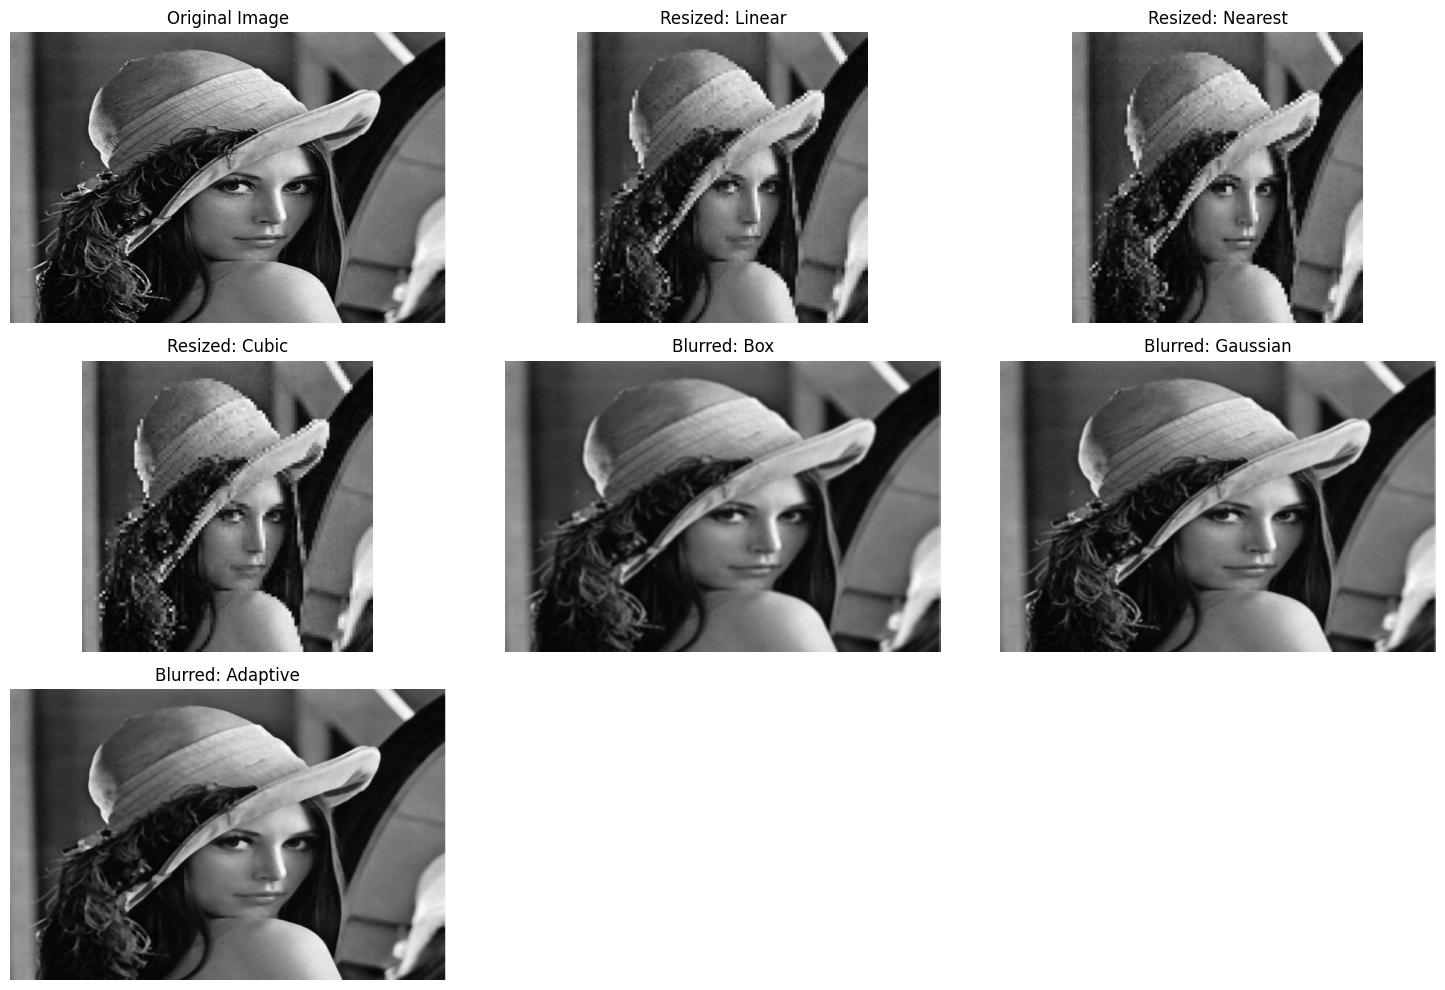

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Load the images
image_1 = cv2.imread('/content/Picture 1.jpg', cv2.IMREAD_COLOR)  # Image 1
image_2 = cv2.imread('/content/Picture 1.png', cv2.IMREAD_GRAYSCALE)  # Image 2

# Convert image_1 to RGB for matplotlib display
image_1_rgb = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)

# 1.1 Image Resizing
# Resizing dimensions
resize_dim = (100, 100)  # Example dimensions

# 1.1.1 Linear Interpolation
resized_linear = cv2.resize(image_1, resize_dim, interpolation=cv2.INTER_LINEAR)

# 1.1.2 Nearest Neighbors
resized_nearest = cv2.resize(image_1, resize_dim, interpolation=cv2.INTER_NEAREST)

# 1.1.3 Polynomial Interpolation (Cubic)
resized_cubic = cv2.resize(image_1, resize_dim, interpolation=cv2.INTER_CUBIC)

# 1.2 Image Blurring
# 1.2.1 Box Blurring
blurred_box = cv2.blur(image_1, (5, 5))

# 1.2.2 Gaussian Blurring
gaussian_blur = cv2.GaussianBlur(image_1, (5, 5), 0)

# 1.2.3 Adaptive Blurring (Median Blur)
adaptive_blur = cv2.medianBlur(image_1, 5)

# Display the results
plt.figure(figsize=(15, 10))

# Original Image
plt.subplot(3, 3, 1)
plt.imshow(image_1_rgb)
plt.title("Original Image")
plt.axis("off")

# Resized Images
plt.subplot(3, 3, 2)
plt.imshow(cv2.cvtColor(resized_linear, cv2.COLOR_BGR2RGB))
plt.title("Resized: Linear")
plt.axis("off")

plt.subplot(3, 3, 3)
plt.imshow(cv2.cvtColor(resized_nearest, cv2.COLOR_BGR2RGB))
plt.title("Resized: Nearest")
plt.axis("off")

plt.subplot(3, 3, 4)
plt.imshow(cv2.cvtColor(resized_cubic, cv2.COLOR_BGR2RGB))
plt.title("Resized: Cubic")
plt.axis("off")

# Blurred Images
plt.subplot(3, 3, 5)
plt.imshow(cv2.cvtColor(blurred_box, cv2.COLOR_BGR2RGB))
plt.title("Blurred: Box")
plt.axis("off")

plt.subplot(3, 3, 6)
plt.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
plt.title("Blurred: Gaussian")
plt.axis("off")

plt.subplot(3, 3, 7)
plt.imshow(cv2.cvtColor(adaptive_blur, cv2.COLOR_BGR2RGB))
plt.title("Blurred: Adaptive")
plt.axis("off")

plt.tight_layout()
plt.show()



Model: Naive Bayes
Accuracy: 0.7666666666666667
Precision: 0.8297892604928961
Recall: 0.7666666666666667
F1-Score: 0.7637769562169517
Confusion Matrix:
[[31  0  0  0  0  1  0  1  0  0]
 [ 0 21  0  0  0  0  0  2  4  1]
 [ 0  5 12  0  0  3  1  0 12  0]
 [ 0  0  1 26  0  0  1  0  6  0]
 [ 1  0  0  0 24  0  2 19  0  0]
 [ 0  0  0  1  0 44  1  1  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  1  0  0  0  1  0  3 25  0]
 [ 0  1  1  1  0  4  0  4  4 25]]

Model: SVM
Accuracy: 0.975
Precision: 0.9752649898745233
Recall: 0.975
F1-Score: 0.9749569545734269
Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  1  0 45  1  0  0  0]
 [ 1  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  1  0  0 28  0]
 [ 0  0  0  1  0  0  0  1  0 38]]
ROC: fpr=[0. 0. 0. 1.], tpr=[0.         0.03571429 1.         1.  

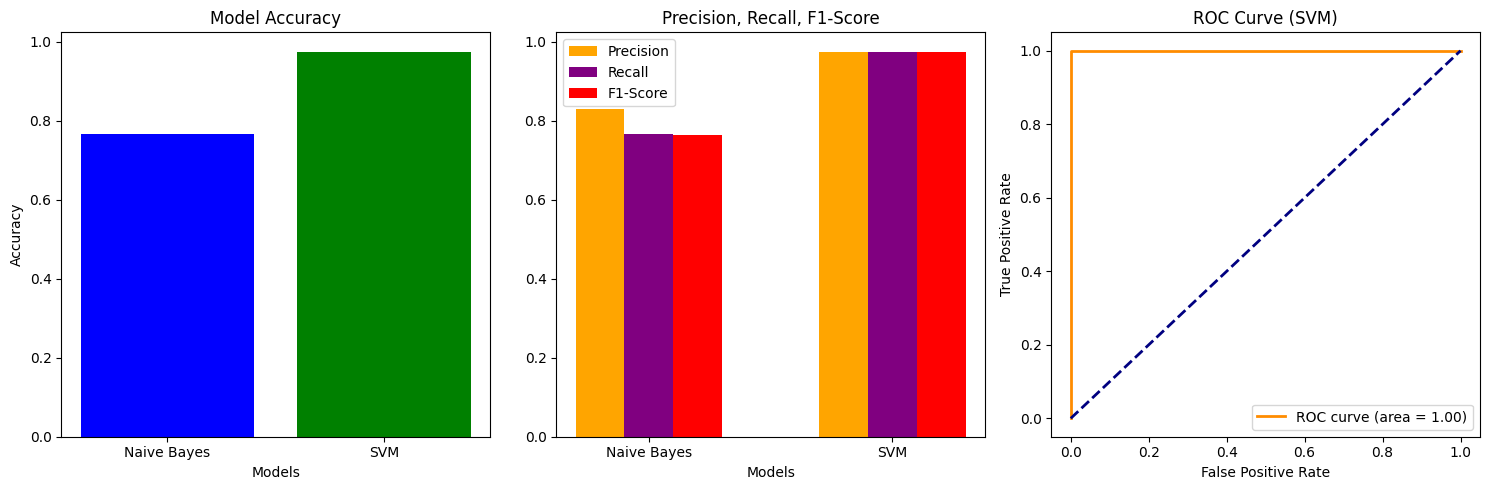

In [5]:
# # Task-2: Load MNIST Dataset
# data = load_digits()
# X = data.data  # Feature matrix (8x8 images flattened into 64 pixels)
# y = data.target  # Labels (0-9 digits)

# # Normalize the data
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# # Split into training and testing sets (80-20 split)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize models
# model_1 = GaussianNB()  # Naive Bayes
# model_2 = SVC(probability=True, kernel='linear')  # Support Vector Machine

# # Train and evaluate using k-fold cross-validation
# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# # Naive Bayes
# nb_scores = cross_val_score(model_1, X_train, y_train, cv=kf, scoring='accuracy')
# model_1.fit(X_train, y_train)
# y_pred_nb = model_1.predict(X_test)

# # SVM
# svm_scores = cross_val_score(model_2, X_train, y_train, cv=kf, scoring='accuracy')
# model_2.fit(X_train, y_train)
# y_pred_svm = model_2.predict(X_test)

# # Evaluate Metrics
# metrics = {}
# for name, y_pred, model in [("Naive Bayes", y_pred_nb, model_1), ("SVM", y_pred_svm, model_2)]:
#     metrics[name] = {
#         "Accuracy": accuracy_score(y_test, y_pred),
#         "Precision": precision_score(y_test, y_pred, average='weighted'),
#         "Recall": recall_score(y_test, y_pred, average='weighted'),
#         "F1-Score": f1_score(y_test, y_pred, average='weighted'),
#         "Confusion Matrix": confusion_matrix(y_test, y_pred),
#     }
#     if name == "SVM":
#         # Calculate ROC and AUC only for SVM (requires probability estimates)
#         y_prob = model.predict_proba(X_test)
#         fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1], pos_label=1)
#         metrics[name]["ROC"] = (fpr, tpr)
#         metrics[name]["AUC"] = roc_auc_score(y_test, y_prob, multi_class='ovo')

# # Print Results
# for model_name, model_metrics in metrics.items():
#     print(f"\nModel: {model_name}")
#     for metric_name, value in model_metrics.items():
#         if metric_name == "Confusion Matrix":
#             print(f"{metric_name}:\n{value}")
#         elif metric_name == "ROC":
#             print(f"{metric_name}: fpr={value[0]}, tpr={value[1]}")
#         else:
#             print(f"{metric_name}: {value}")

# # Visualization of Metrics
# plt.figure(figsize=(15, 5))

# # Accuracy Comparison
# plt.subplot(1, 3, 1)
# models = list(metrics.keys())
# accuracies = [metrics[model]["Accuracy"] for model in models]
# plt.bar(models, accuracies, color=['blue', 'green'])
# plt.title('Model Accuracy')
# plt.xlabel('Models')
# plt.ylabel('Accuracy')

# # Precision, Recall, and F1-Score Comparison
# plt.subplot(1, 3, 2)
# precision = [metrics[model]["Precision"] for model in models]
# recall = [metrics[model]["Recall"] for model in models]
# f1_score_values = [metrics[model]["F1-Score"] for model in models]
# bar_width = 0.2
# x = np.arange(len(models))
# plt.bar(x - bar_width, precision, bar_width, label='Precision', color='orange')
# plt.bar(x, recall, bar_width, label='Recall', color='purple')
# plt.bar(x + bar_width, f1_score_values, bar_width, label='F1-Score', color='red')
# plt.title('Precision, Recall, F1-Score')
# plt.xlabel('Models')
# plt.xticks(x, models)
# plt.legend()

# # ROC Curve for SVM
# if "SVM" in metrics:
#     plt.subplot(1, 3, 3)
#     fpr, tpr = metrics["SVM"]["ROC"]
#     plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % metrics["SVM"]["AUC"])
#     plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#     plt.title('ROC Curve (SVM)')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.legend(loc="lower right")

# plt.tight_layout()
# plt.show()


Model: Naive Bayes
Accuracy: 0.85
Recall: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.83      0.86      0.84        28
           2       0.91      0.61      0.73        33
           3       0.91      0.85      0.88        34
           4       0.97      0.83      0.89        46
           5       0.90      0.94      0.92        47
           6       0.92      0.97      0.94        35
           7       0.69      0.97      0.80        34
           8       0.57      0.87      0.68        30
           9       0.96      0.65      0.78        40

    accuracy                           0.85       360
   macro avg       0.86      0.85      0.84       360
weighted avg       0.88      0.85      0.85       360

Confusion Matrix:
[[31  0  0  0  0  1  0  1  0  0]
 [ 0 24  0  0  0  0  0  0  3  1]
 [ 0  2 20  0  0  0  1  0 10  0]
 [ 0  0  1 29  0  1  0  0  3  0]
 [ 0  0  0  0 38  0  

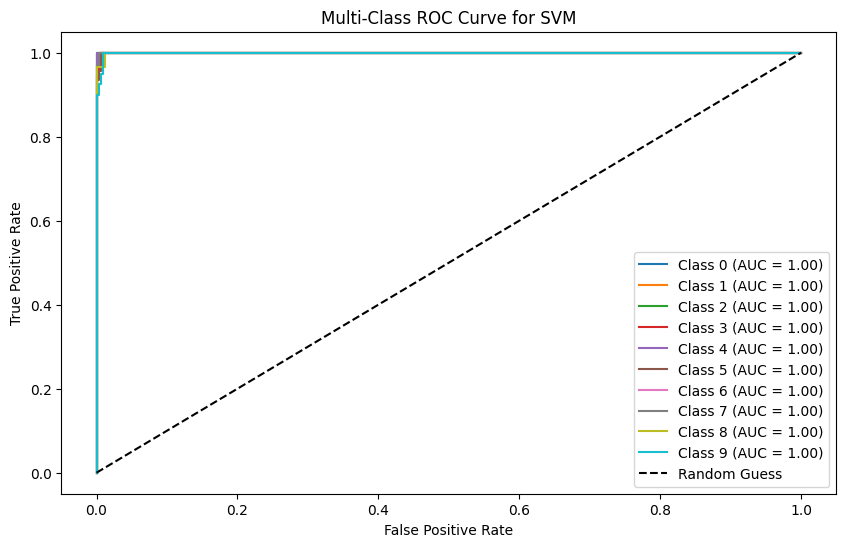

In [6]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
    roc_curve,
    recall_score,
)
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

# One-hot encode labels for multi-class evaluation
y_binarized = label_binarize(y, classes=np.unique(y))
n_classes = y_binarized.shape[1]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate models
def train_and_evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average="weighted")
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Recall: {recall:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    return y_pred

# Naive Bayes
nb_model = GaussianNB()
y_pred_nb = train_and_evaluate_model(nb_model, "Naive Bayes", X_train, X_test, y_train, y_test)

# SVM
svm_model = SVC(probability=True, kernel="linear")
y_pred_svm = train_and_evaluate_model(svm_model, "SVM", X_train, X_test, y_train, y_test)

# Multi-class ROC Curve for SVM
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
y_prob_svm = svm_model.predict_proba(X_test)

fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob_svm[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_prob_svm[:, i])

# Plotting ROC Curves
plt.figure(figsize=(10, 6))
colors = plt.cm.tab10(np.linspace(0, 1, n_classes))

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})", color=color)

plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve for SVM")
plt.legend(loc="lower right")
plt.show()